### Setup

In [1]:
import pandas as pd
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt


filename = 'C:/Users/endwy/Documents/Columbia MSBA/Spring 2019/E4524 - Analytics in Practice/Data/Csv/a_test.csv'
df = pd.read_csv(filename, header=0)
df=df.drop(columns=(['Unnamed: 0','Treated']))
#df.head(2)

In [2]:
df['Treatment $'] = np.log1p(df['Treatment $'])

train, test = train_test_split(df, test_size = 0.25,random_state=1)
x_train = train.drop(['Treatment $'],axis=1)
y_train = train['Treatment $']
x_test = test.drop(['Treatment $'],axis=1)
y_test = test['Treatment $']

#x_test.shape

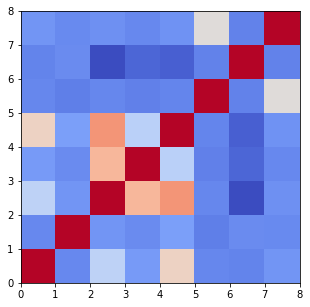

In [7]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

### XGBoost Models

### Response = Treatment$

In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [9]:
#RandomizedSearch for best patameters
clf = xgb.XGBRegressor(objective ='reg:linear')

param_grid = {
        'max_depth': [5, 8, 10, 15],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'alpha': [0, 0.5, 1.0, 5, 10],
        'n_estimators': [10,20,30,40,50]}


rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=5,
                            refit=False, random_state=42)
print("Randomized search..")
rs_clf.fit(x_train, y_train)

Randomized search..
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future

[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 
[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learni

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.1s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.1s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [5, 8, 10, 15], 'learning_rate': [0.001, 0.01, 0.1, 0.2], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'alpha': [0, 0.5, 1.0, 5, 10], 'n_estimators': [10, 20, 30, 40, 50]},
          pre_dispatch='2*n_jobs', random_state=42, refit=False,
          return_train_score='warn', scoring=None, verbose=2)

In [10]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 3, alpha = 1, n_estimators = 100)

xg_reg.fit(x_train,y_train)
preds_model = xg_reg.predict(x_test)

rmse = math.sqrt(mean_squared_error(y_test, preds_model))
print("RMSE: %f" % (rmse))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


RMSE: 1.540676


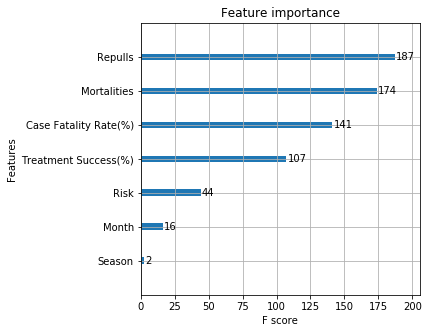

In [11]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Response = Treatment%

In [13]:
import pandas as pd
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt


filename = 'C:/Users/endwy/Documents/Columbia MSBA/Spring 2019/E4524 - Analytics in Practice/Data/Csv/a_test.csv'
df2 = pd.read_csv(filename, header=0)
df2=df2.drop(columns=(['Unnamed: 0','Treated']))

df2['Treatment $'] = np.log1p(df2['Treatment $'])

train, test = train_test_split(df2, test_size = 0.25,random_state=1)
x_train = train.drop(['Treatment Success(%)'],axis=1)
y_train = train['Treatment Success(%)']
x_test = test.drop(['Treatment Success(%)'],axis=1)
y_test = test['Treatment Success(%)']

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

#RandomizedSearch for best patameters
clf = xgb.XGBRegressor(objective ='reg:linear')

param_grid = {
        'max_depth': [5, 8, 10, 15],
        'learning_rate': [0.001, 0.01, 0.1, 0.2],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'alpha': [0, 0.5, 1.0, 5, 10],
        'n_estimators': [10,20,30,40,50]}


rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=5,
                            refit=False, random_state=42)
print("Randomized search..")
rs_clf.fit(x_train, y_train)

Randomized search..
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 
[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future

[CV]  n_estimators=10, max_depth=5, learning_rate=0.2, colsample_bytree=0.8, alpha=0.5, total=   0.0s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 
[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 
[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s
[CV] n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0 
[CV]  n_estimators=50, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=1.0, total=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.5, alpha=1.0, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.6, alpha=5, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=10, total=   0.1s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0 
[CV]  n_estimators=20, max_depth=8, learning_rate=0.2, colsample_bytree=0.9, alpha=0, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.1s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=40, max_depth=15, learning_rate=0.01, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=10, learning_rate=0.001, colsample_bytree=0.8, alpha=0, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=30, max_depth=5, learning_rate=0.1, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.1, colsample_bytree=0.6, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0 
[CV]  n_estimators=10, max_depth=10, learning_rate=0.1, colsample_bytree=0.5, alpha=0, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5 
[CV]  n_estimators=10, max_depth=8, learning_rate=0.001, colsample_bytree=0.7, alpha=5, total=   0.0s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5 
[CV]  n_estimators=50, max_depth=8, learning_rate=0.1, colsample_bytree=0.7, alpha=0.5, total=   0.1s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=20, max_depth=10, learning_rate=0.2, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.4, alpha=5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.001, colsample_bytree=0.7, alpha=1.0, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5 
[CV]  n_estimators=10, max_depth=15, learning_rate=0.2, colsample_bytree=0.9, alpha=0.5, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.001, colsample_bytree=0.9, alpha=10, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s
[CV] n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0 
[CV]  n_estimators=50, max_depth=5, learning_rate=0.2, colsample_bytree=0.6, alpha=1.0, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.3s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [5, 8, 10, 15], 'learning_rate': [0.001, 0.01, 0.1, 0.2], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'alpha': [0, 0.5, 1.0, 5, 10], 'n_estimators': [10, 20, 30, 40, 50]},
          pre_dispatch='2*n_jobs', random_state=42, refit=False,
          return_train_score='warn', scoring=None, verbose=2)

In [14]:
xg_reg2 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 3, alpha = 1, n_estimators = 100)

xg_reg2.fit(x_train,y_train)
preds_model = xg_reg2.predict(x_test)

rmse = math.sqrt(mean_squared_error(y_test, preds_model))
print("RMSE: %f" % (rmse))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


RMSE: 7.042370


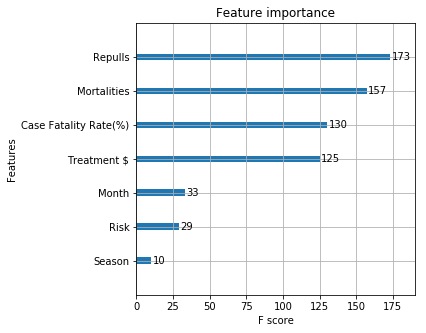

In [16]:
xgb.plot_importance(xg_reg2)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()